In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('data_medicine.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

c:\users\sys\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


M    104
F     96
Name: Sex, dtype: int64


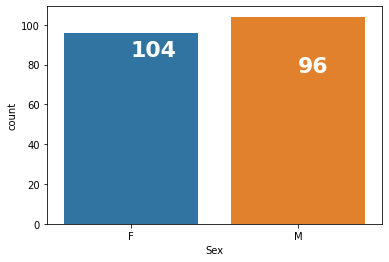

In [19]:
sns.countplot(df['Sex'])
x=df['Sex'].value_counts()
print(df['Sex'].value_counts())
for i,v in enumerate(x):
    plt.text(i,v-20,str(v),size=22,weight='bold',color='w')

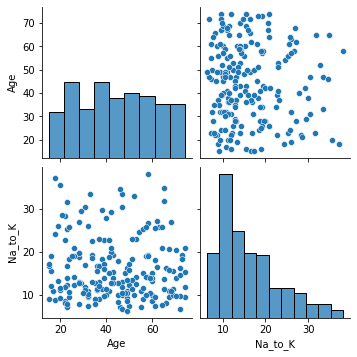

In [20]:
sns.pairplot(df)

<AxesSubplot:>

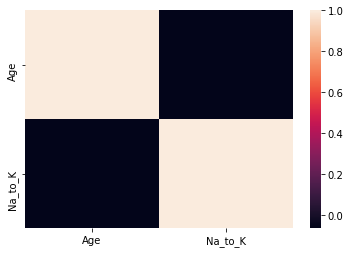

In [21]:
sns.heatmap(df.corr())

In [23]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


c:\users\sys\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'cholesterol vs sex')

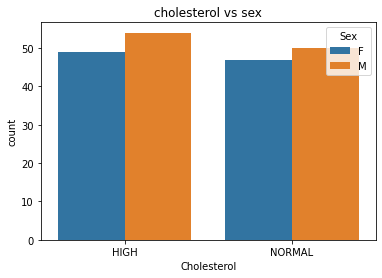

In [27]:
sns.countplot('Cholesterol',hue='Sex',data=df)
plt.title('cholesterol vs sex')

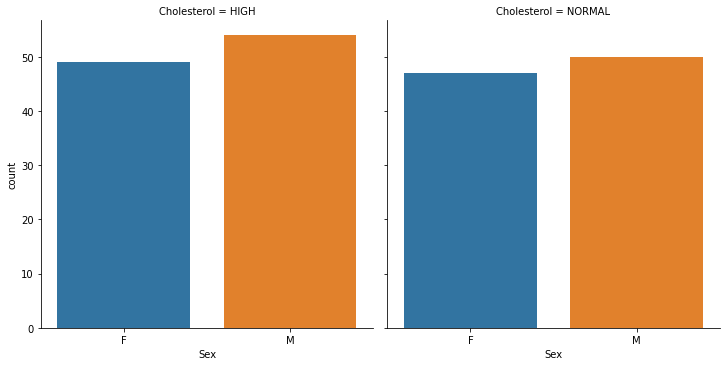

In [28]:
sns.catplot(x='Sex',col='Cholesterol',kind='count',data=df)

In [29]:
df.groupby('Sex').count()

,Age,BP,Cholesterol,Na_to_K,Drug
Sex,,,,,
F,96,96,96,96,96
M,104,104,104,104,104


In [30]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

c:\users\sys\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


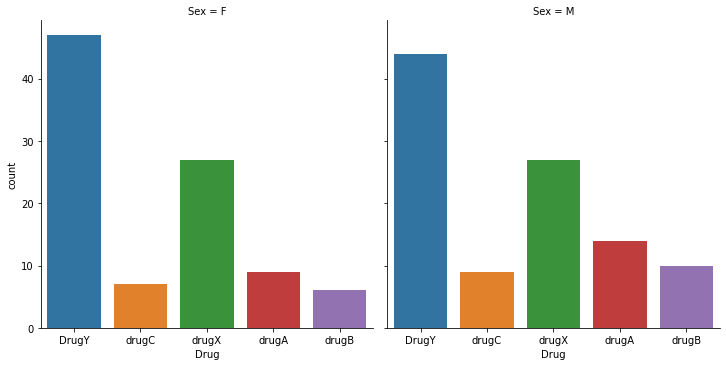

In [32]:
sns.catplot('Drug',col='Sex',kind='count',data=df)

c:\users\sys\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Na_to_K'>

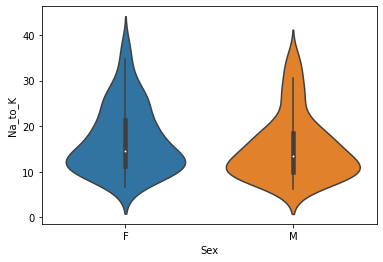

In [33]:
sns.violinplot('Sex','Na_to_K',data=df)

c:\users\sys\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


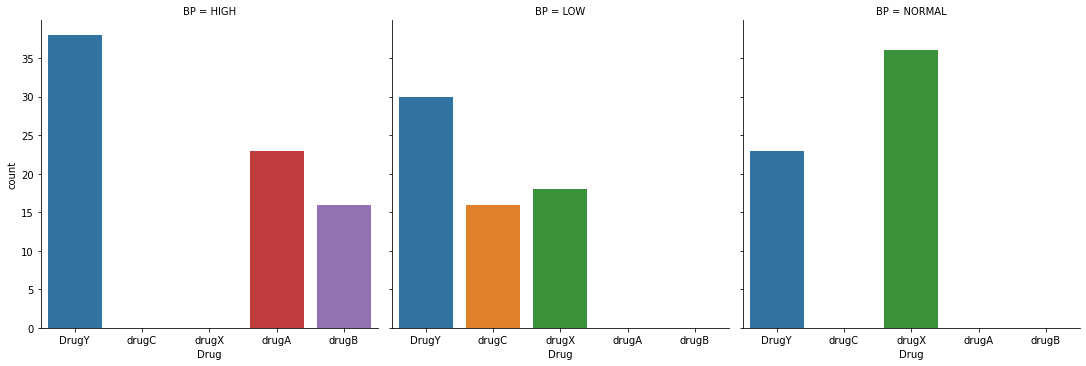

In [35]:
sns.catplot('Drug',col='BP',kind='count',data=df)

(array([16., 22., 20., 20., 21., 28., 16., 23., 18., 16.]),
 array([15. , 20.9, 26.8, 32.7, 38.6, 44.5, 50.4, 56.3, 62.2, 68.1, 74. ]),
 <BarContainer object of 10 artists>)

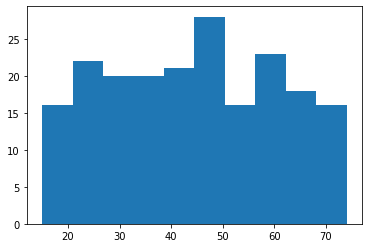

In [37]:

plt.hist('Age',data=df)

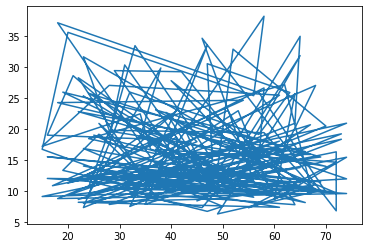

In [39]:
plt.plot('Age','Na_to_K',data=df)

In [43]:
a=[i for i in df.columns if (df[i].dtypes=='object')]
a

['Sex', 'BP', 'Cholesterol', 'Drug']

In [45]:
from sklearn.preprocessing import LabelEncoder as l
l=l()

In [49]:
for i in a:
    df[i]=l.fit_transform(df[i])

In [50]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [51]:
x=df.iloc[:,df.columns!='BP']
y=df.iloc[:,df.columns=='BP']

In [52]:
from sklearn.model_selection import train_test_split as m

In [54]:
x_trn,x_tst,y_trn,y_tst=m(x,y,test_size=.2,random_state=32)

In [70]:
from sklearn.linear_model import LogisticRegression as l
r=l()

In [71]:
e=r.fit(x_trn,y_trn)

c:\users\sys\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\sys\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
y=e.predict(x_tst)
y

array([0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1])

In [73]:
e.score(x_trn,y_trn)

0.56875

In [74]:
e.score(x_tst,y_tst)

0.425

In [75]:
from sklearn.metrics import confusion_matrix as a

In [76]:
a(y_tst,y)

array([[10,  4,  0],
       [ 7,  2,  5],
       [ 4,  3,  5]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_tst,y))

0.425
